##Preprocessing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
import random
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
import numpy as np

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


https://www.kaggle.com/code/jameelsawafta/chest-x-ray-images-pneumonia


In [ ]:
class XrayDataset(Dataset):
    def __init__(self, paths , labels, transform=None):
        self.paths= paths
        self.labels= labels

        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        path= self.paths[index]
        image = Image.open(path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        label = self.labels[index]
        return image,label

In [ ]:
train_normal = glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/train/NORMAL/*")
train_pneumonia= glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/train/PNEUMONIA/*")

test_normal = glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/test/NORMAL/*")
test_pneumonia= glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/test/PNEUMONIA/*")

In [ ]:
train_paths = train_normal + train_pneumonia
test_paths =  test_normal + test_pneumonia

train_labels= [0] * len(train_normal) + [1] * len(train_pneumonia)
test_labels= [0] * len(test_normal) + [1] * len(test_pneumonia)

print('Train dataset size:', len(train_paths) , ", train labels", len(train_labels))
print('Test dataset size:', len(test_paths) , ", test labels", len(test_labels))

train_dataset = XrayDataset(train_paths, train_labels)
test_dataset = XrayDataset(test_paths, test_labels)

train_size = int(0.9 * len(train_dataset)) # 0.9 -> train
val_size = len(train_dataset) - train_size # 0.1 -> validation
train_dataset, val_dataset = random_split(dataset=train_dataset, lengths=[train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
len(train_loader), len(val_loader), len(test_loader)

Train dataset size: 5216 , train labels 5216
Test dataset size: 624 , test labels 624


(147, 522, 624)

In [ ]:
# Print a few more samples from the dataset
for i in range(1333, 1345):  # Print 3 samples
    img, label = train_dataset[i]
    print("Sample", i + 1, "- Image shape:", img.shape, ", Label:", label)

Sample 1334 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1335 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1336 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1337 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1338 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1339 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1340 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1341 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1342 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1343 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1344 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1345 - Image shape: torch.Size([3, 224, 224]) , Label: 1


##Print image

Total number of samples: 4694
Sample details:
Sample 0: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 1: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 5: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 6: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 7: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 8: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 9: Label - 0, Image shape - torch.Size([3, 224, 224])


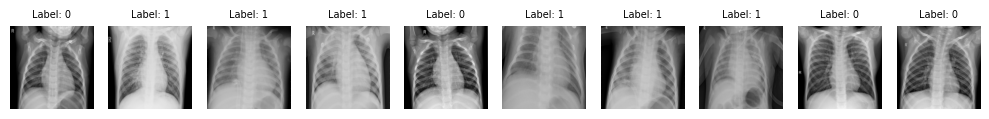

Sample 800: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 801: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 802: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 803: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 804: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 805: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 806: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 807: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 808: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 809: Label - 1, Image shape - torch.Size([3, 224, 224])


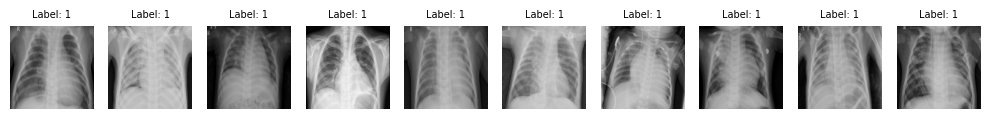

Sample 1600: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1601: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1602: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1603: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 1604: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1605: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1606: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1607: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 1608: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 1609: Label - 0, Image shape - torch.Size([3, 224, 224])


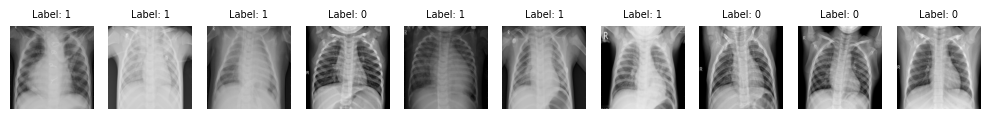

Sample 2400: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2401: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 2402: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2403: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2404: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 2405: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 2406: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2407: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2408: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 2409: Label - 1, Image shape - torch.Size([3, 224, 224])


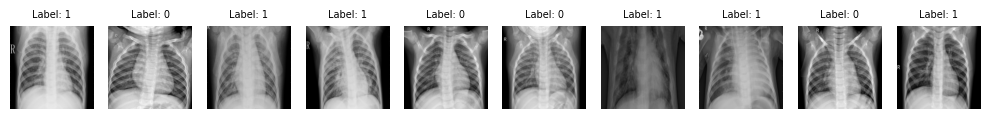

Sample 3200: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3201: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3202: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3203: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3204: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 3205: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3206: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3207: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 3208: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 3209: Label - 1, Image shape - torch.Size([3, 224, 224])


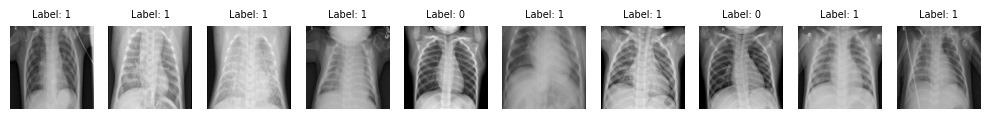

Sample 4000: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4001: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4002: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4003: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4004: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4005: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4006: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 4007: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4008: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 4009: Label - 1, Image shape - torch.Size([3, 224, 224])


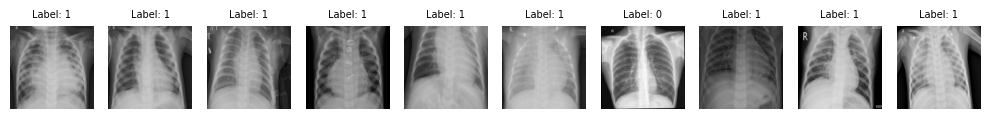

In [ ]:
# Print dataset details and display images five at a time
print(f"Total number of samples: {len(train_dataset)}")
print("Sample details:")
for i in range(0, len(train_dataset), 800):
    fig, axes = plt.subplots(1, 10, figsize=(10, 5))
    for j in range(10):
        if i + j < len(train_dataset):
            sample, label = train_dataset[i + j]
            print(f"Sample {i + j}: Label - {label}, Image shape - {sample.shape}")
            axes[j].imshow(sample.permute(1, 2, 0))  # Convert tensor back to HWC format
            axes[j].set_title(f"Label: {label}", fontsize = 7)
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

Total number of samples: 624
Sample details:
Sample 0: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 1: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 2: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 3: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 4: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 5: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 6: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 7: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 8: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 9: Label - 0, Image shape - torch.Size([3, 224, 224])


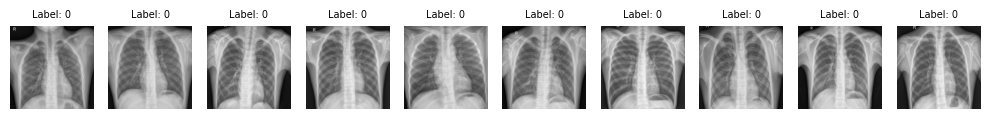

Sample 100: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 101: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 102: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 103: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 104: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 105: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 106: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 107: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 108: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 109: Label - 0, Image shape - torch.Size([3, 224, 224])


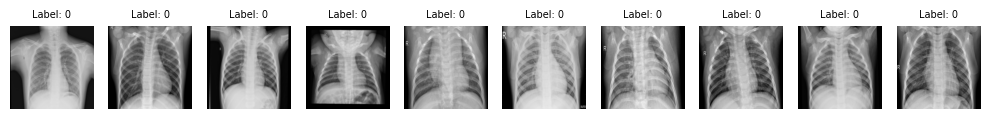

Sample 200: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 201: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 202: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 203: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 204: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 205: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 206: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 207: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 208: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 209: Label - 0, Image shape - torch.Size([3, 224, 224])


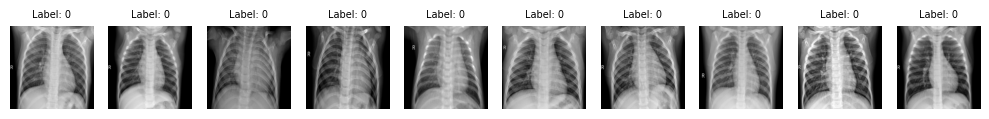

Sample 300: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 301: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 302: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 303: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 304: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 305: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 306: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 307: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 308: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 309: Label - 1, Image shape - torch.Size([3, 224, 224])


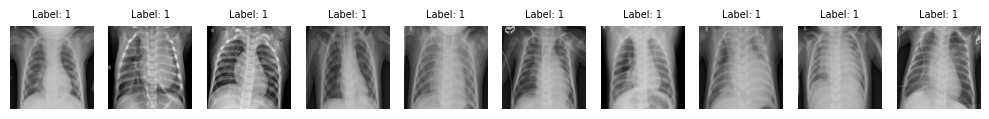

Sample 400: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 401: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 402: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 403: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 404: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 405: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 406: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 407: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 408: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 409: Label - 1, Image shape - torch.Size([3, 224, 224])


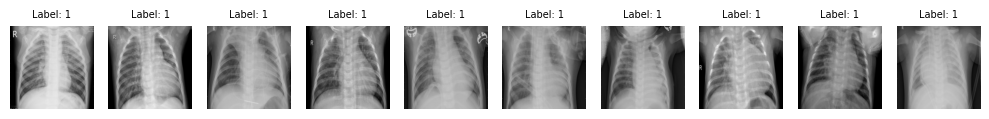

Sample 500: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 501: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 502: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 503: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 504: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 505: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 506: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 507: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 508: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 509: Label - 1, Image shape - torch.Size([3, 224, 224])


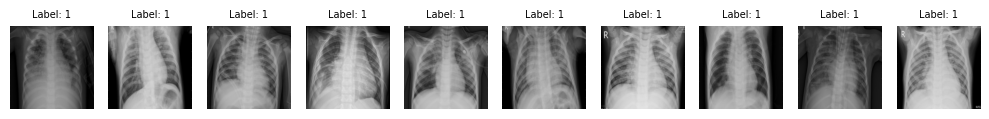

Sample 600: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 601: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 602: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 603: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 604: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 605: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 606: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 607: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 608: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 609: Label - 1, Image shape - torch.Size([3, 224, 224])


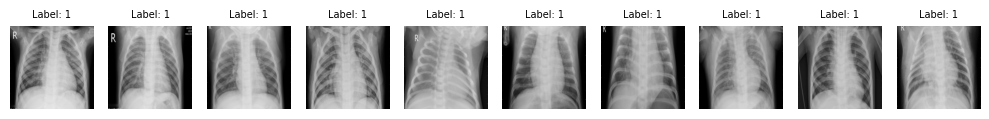

In [ ]:
# Print dataset details and display images five at a time
print(f"Total number of samples: {len(test_dataset)}")
print("Sample details:")
for i in range(0, len(test_dataset), 100):
    fig, axes = plt.subplots(1, 10, figsize=(10, 5))
    for j in range(10):
        if i + j < len(test_dataset):
            sample, label = test_dataset[i + j]
            print(f"Sample {i + j}: Label - {label}, Image shape - {sample.shape}")
            axes[j].imshow(sample.permute(1, 2, 0))  # Convert tensor back to HWC format
            axes[j].set_title(f"Label: {label}", fontsize = 7)
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

Total number of samples: 522
Sample details:
Sample 0: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 1: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 2: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 3: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 4: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 5: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 6: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 7: Label - 1, Image shape - torch.Size([3, 224, 224])


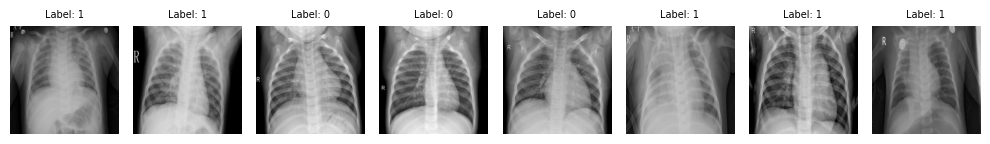

Sample 80: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 81: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 82: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 83: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 84: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 85: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 86: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 87: Label - 1, Image shape - torch.Size([3, 224, 224])


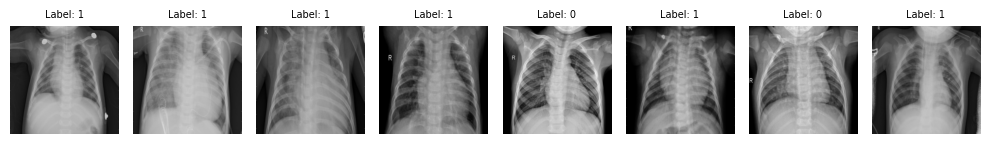

Sample 160: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 161: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 162: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 163: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 164: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 165: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 166: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 167: Label - 0, Image shape - torch.Size([3, 224, 224])


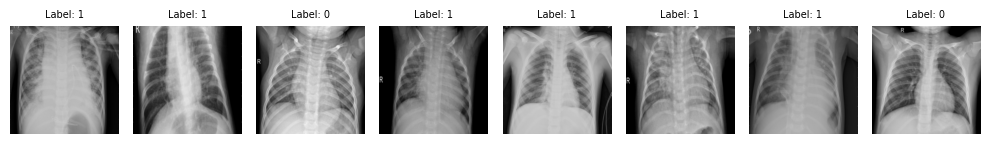

Sample 240: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 241: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 242: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 243: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 244: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 245: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 246: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 247: Label - 1, Image shape - torch.Size([3, 224, 224])


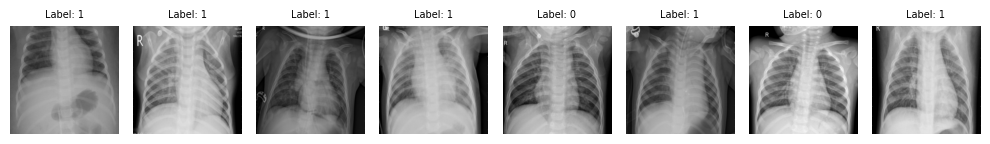

Sample 320: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 321: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 322: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 323: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 324: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 325: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 326: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 327: Label - 1, Image shape - torch.Size([3, 224, 224])


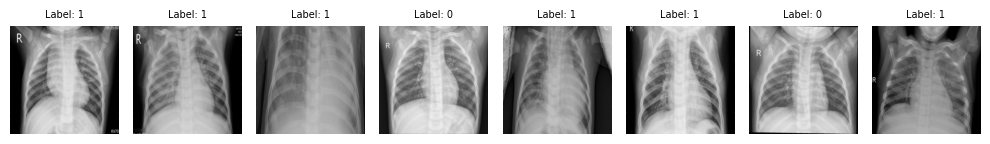

Sample 400: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 401: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 402: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 403: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 404: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 405: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 406: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 407: Label - 0, Image shape - torch.Size([3, 224, 224])


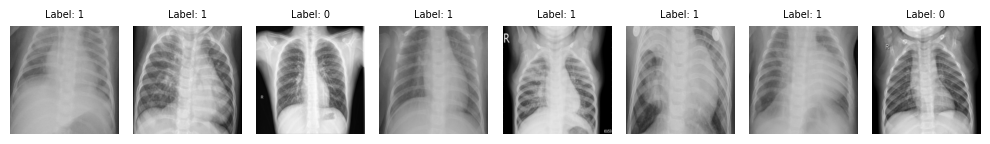

Sample 480: Label - 0, Image shape - torch.Size([3, 224, 224])
Sample 481: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 482: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 483: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 484: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 485: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 486: Label - 1, Image shape - torch.Size([3, 224, 224])
Sample 487: Label - 1, Image shape - torch.Size([3, 224, 224])


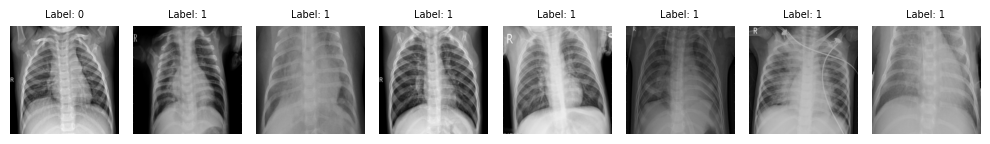

In [ ]:
# Print dataset details and display images five at a time
print(f"Total number of samples: {len(val_dataset)}")
print("Sample details:")
for i in range(0, len(val_dataset), 80):
    fig, axes = plt.subplots(1, 8, figsize=(10, 5))
    for j in range(8):
        if i + j < len(val_dataset):
            sample, label = val_dataset[i + j]
            print(f"Sample {i + j}: Label - {label}, Image shape - {sample.shape}")
            axes[j].imshow(sample.permute(1, 2, 0))  # Convert tensor back to HWC format
            axes[j].set_title(f"Label: {label}", fontsize = 7)
            axes[j].axis('off')
    plt.tight_layout()
    plt.show()

##VGG16

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class VGG16(torch.nn.Module):
  def __init__(self, num_classes):
    super(VGG16, self).__init__()

    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,
                  out_channels=64,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),
                  stride=(2,2))
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=64,
                  out_channels=128,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=128,
                  out_channels=128,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),
                  stride=(2,2))
    )

    self.block3 = nn.Sequential(
        nn.Conv2d(in_channels=128,
                  out_channels=256,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=256,
                  out_channels=256,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=256,
                  out_channels=256,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),
                  stride=(2,2))
    )

    self.block4 = nn.Sequential(
        nn.Conv2d(in_channels=256,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),
                  stride=(2,2))
    )

    self.block5 = nn.Sequential(
        nn.Conv2d(in_channels=512,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=512,
                  out_channels=512,
                  kernel_size=(3,3),
                  stride=(1,1),
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2),
                  stride=(2,2))
    )

    self.classifier = nn.Sequential(
        nn.Linear(512*7*7, 4096),
        nn.ReLU(),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Linear(4096, 1000),
        nn.ReLU(),
        nn.Linear(1000, num_classes),
    )
    for m in self.modules():
      if isinstance(m, torch.nn.Conv2d):
        m.weight.detach().normal_(0, 0.05)
        if m.bias is not None:
          m.bias.detach().zero_()
      elif isinstance(m, torch.nn.Linear):
        m.weight.detach().normal_(0, 0.05)
        m.bias.detach().zero_()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = self.block4(x)
    x = self.block5(x)

    logits = self.classifier(x.view(-1, 512*7*7))
    probas = F.softmax(logits, dim=1)
    return probas

In [ ]:
import torch.optim as optim
from tqdm import tqdm
# Instantiate the model
vgg16_model = VGG16(num_classes=2)
print(vgg16_model)

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

##VGG16 (pytorch)

In [ ]:
from torchvision.models import vgg16

class VGG16Custom(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG16Custom, self).__init__()
        self.vgg16 = vgg16(pretrained=False)
        in_features = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.vgg16(x)

In [ ]:
vgg16_model = VGG16Custom().to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
from torchsummary import summary

summary(vgg16_model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

##訓練模型

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
import torch.optim as optim
from tqdm.notebook import tqdm

vgg16_model = vgg16_model.to(device)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)
vgg16_optimizer = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9) # lr 過高?
train_loss_history_vgg16, val_loss_history_vgg16 = [], []
train_acc_history_vgg16, val_acc_history_vgg16 = [], []


num_epochs = 25

# VGG16的訓練迴圈
for epoch in range(num_epochs):
    train_loss, train_acc = 0, 0
    vgg16_model.train()
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        vgg16_optimizer.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion(outputs, labels)
        acc = calculate_accuracy(outputs, labels)
        loss.backward()
        vgg16_optimizer.step()
        train_loss += loss.item()
        train_acc += acc.item()

    mean_train_loss = train_loss / len(train_loader)
    mean_train_acc = train_acc / len(train_loader)

    train_loss_history_vgg16.append(mean_train_loss)
    train_acc_history_vgg16.append(mean_train_acc)

    val_loss, val_acc = 0, 0
    vgg16_model.eval()
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16_model(inputs)
            loss = criterion(outputs, labels)
            acc = calculate_accuracy(outputs, labels)
            val_loss += loss.item()
            val_acc += acc.item()

    mean_val_loss = val_loss / len(val_loader)
    mean_val_acc = val_acc / len(val_loader)

    val_loss_history_vgg16.append(mean_val_loss)
    val_acc_history_vgg16.append(mean_val_acc)

    print(f'Epoch: {epoch+1:02} | Train Loss: {mean_train_loss:.4f} | Train Acc: {mean_train_acc*100:.2f}% | '
          f'Val Loss: {mean_val_loss:.4f} |  Val Acc: {mean_val_acc*100:.2f}%')

  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 01 | Train Loss: 0.5876 | Train Acc: 73.65% | Val Loss: 0.5407 |  Val Acc: 77.01%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 02 | Train Loss: 0.4917 | Train Acc: 77.69% | Val Loss: 0.2482 |  Val Acc: 90.61%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 03 | Train Loss: 0.2633 | Train Acc: 89.06% | Val Loss: 0.2617 |  Val Acc: 89.08%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 04 | Train Loss: 0.1651 | Train Acc: 93.74% | Val Loss: 0.0981 |  Val Acc: 96.17%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 05 | Train Loss: 0.1355 | Train Acc: 95.13% | Val Loss: 0.1872 |  Val Acc: 92.15%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 06 | Train Loss: 0.1265 | Train Acc: 95.45% | Val Loss: 0.1013 |  Val Acc: 95.59%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 07 | Train Loss: 0.1122 | Train Acc: 96.00% | Val Loss: 0.1280 |  Val Acc: 95.21%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 08 | Train Loss: 0.1007 | Train Acc: 96.36% | Val Loss: 0.1013 |  Val Acc: 95.59%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 09 | Train Loss: 0.0864 | Train Acc: 97.05% | Val Loss: 0.0764 |  Val Acc: 96.55%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 10 | Train Loss: 0.0828 | Train Acc: 97.07% | Val Loss: 0.0816 |  Val Acc: 96.17%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 11 | Train Loss: 0.0867 | Train Acc: 96.86% | Val Loss: 0.0747 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 12 | Train Loss: 0.0686 | Train Acc: 97.64% | Val Loss: 0.0873 |  Val Acc: 95.98%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 13 | Train Loss: 0.0711 | Train Acc: 97.47% | Val Loss: 0.0812 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 14 | Train Loss: 0.0696 | Train Acc: 97.22% | Val Loss: 0.0664 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 15 | Train Loss: 0.0593 | Train Acc: 98.13% | Val Loss: 0.0665 |  Val Acc: 96.74%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 16 | Train Loss: 0.0588 | Train Acc: 97.94% | Val Loss: 0.0699 |  Val Acc: 97.32%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 17 | Train Loss: 0.0538 | Train Acc: 98.13% | Val Loss: 0.0695 |  Val Acc: 97.13%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 18 | Train Loss: 0.0543 | Train Acc: 98.28% | Val Loss: 0.0860 |  Val Acc: 96.36%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 19 | Train Loss: 0.0528 | Train Acc: 98.02% | Val Loss: 0.0779 |  Val Acc: 96.36%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 20 | Train Loss: 0.0538 | Train Acc: 98.15% | Val Loss: 0.0839 |  Val Acc: 97.13%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 21 | Train Loss: 0.0457 | Train Acc: 98.35% | Val Loss: 0.0872 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 22 | Train Loss: 0.0434 | Train Acc: 98.49% | Val Loss: 0.0666 |  Val Acc: 96.74%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 23 | Train Loss: 0.0395 | Train Acc: 98.50% | Val Loss: 0.0758 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 24 | Train Loss: 0.0380 | Train Acc: 98.57% | Val Loss: 0.0636 |  Val Acc: 96.93%


  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/522 [00:00<?, ?it/s]

Epoch: 25 | Train Loss: 0.0449 | Train Acc: 98.27% | Val Loss: 0.0699 |  Val Acc: 97.32%


##評估&測試模型

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [ ]:
vgg16_accuracy = evaluate(vgg16_model, test_loader)
print(f"VGG16 Accuracy: {vgg16_accuracy*100}%")

VGG16 Accuracy: 81.89102564102564%


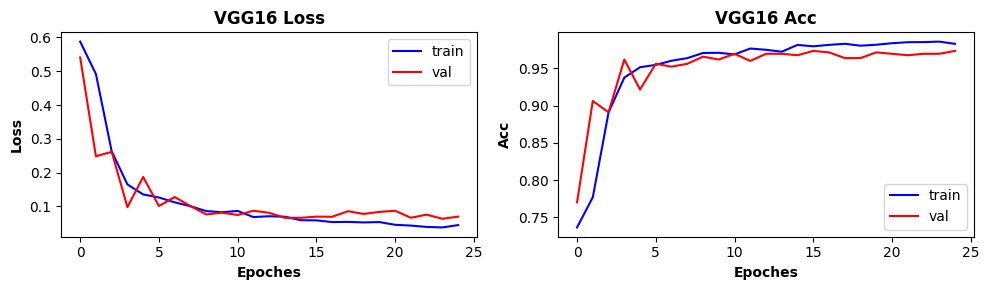

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
data = [
    (train_loss_history_vgg16, val_loss_history_vgg16, 'VGG16 Loss'),
    (train_acc_history_vgg16, val_acc_history_vgg16, 'VGG16 Acc')
]

for i, (tr, val, title) in enumerate(data):
    ax[i].plot(np.arange(num_epochs), tr, label='train', color='blue')
    ax[i].plot(np.arange(num_epochs), val, label='val', color='red')
    ax[i].set_xlabel('Epoches', fontweight='bold')
    ax[i].set_ylabel('Loss' if title == 'VGG16 Loss' else 'Acc', fontweight='bold')
    ax[i].set_title(title, fontweight='bold')
    ax[i].legend()

plt.tight_layout()
plt.show()

#Add Early Stopping & Data Augmentation

##Preprocessing data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import time
import random
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm
import numpy as np

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


https://www.kaggle.com/code/jameelsawafta/chest-x-ray-images-pneumonia


In [5]:
class XrayDataset(Dataset):
    def __init__(self, paths , labels, transform=None):
        self.paths= paths
        self.labels= labels

        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        path= self.paths[index]
        image = Image.open(path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        label = self.labels[index]
        return image,label

In [6]:
train_normal = glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/train/NORMAL/*")
train_pneumonia= glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/train/PNEUMONIA/*")

test_normal = glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/test/NORMAL/*")
test_pneumonia= glob.glob("/content/drive/Shareddrives/小圈圈/chest_xray/test/PNEUMONIA/*")

In [7]:
train_paths = train_normal + train_pneumonia
test_paths =  test_normal + test_pneumonia

train_labels= [0] * len(train_normal) + [1] * len(train_pneumonia)
test_labels= [0] * len(test_normal) + [1] * len(test_pneumonia)

# 訓練集的資料增強
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
])

original_train_dataset = XrayDataset(train_paths, train_labels)

# 資料增強後的訓練資料集
augmented_train_dataset = XrayDataset(train_paths, train_labels, transform=train_transform)

# 將兩個訓練資料集合併
train_dataset = torch.utils.data.ConcatDataset([original_train_dataset, augmented_train_dataset])
test_dataset = XrayDataset(test_paths, test_labels)

# 隨機劃分訓練和驗證資料集
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(dataset=train_dataset, lengths=[train_size, val_size])

print('Train dataset size:', len(train_dataset))
print('Train dataset size:', len(val_dataset))
print('Test dataset size:', len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

len(train_loader), len(val_loader), len(test_loader)


Train dataset size: 9388
Train dataset size: 1044
Test dataset size: 624


(294, 1044, 624)

In [8]:
# Print a few more samples from the dataset
for i in range(1333, 1345):  # Print 3 samples
    img, label = train_dataset[i]
    print("Sample", i + 1, "- Image shape:", img.shape, ", Label:", label)

Sample 1334 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1335 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1336 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1337 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1338 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1339 - Image shape: torch.Size([3, 224, 224]) , Label: 0
Sample 1340 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1341 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1342 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1343 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1344 - Image shape: torch.Size([3, 224, 224]) , Label: 1
Sample 1345 - Image shape: torch.Size([3, 224, 224]) , Label: 1


##VGG16 (pytorch)

In [9]:
from torchvision.models import vgg16

class VGG16Custom(nn.Module):
    def __init__(self, num_classes=2):
        super(VGG16Custom, self).__init__()
        self.vgg16 = vgg16(pretrained=False)
        in_features = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.vgg16(x)

In [10]:
vgg16_model = VGG16Custom().to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [11]:
from torchsummary import summary

summary(vgg16_model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

##訓練模型

In [12]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [13]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [14]:
import torch.optim as optim
from tqdm.notebook import tqdm

vgg16_model = vgg16_model.to(device)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)
vgg16_optimizer = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9) # lr 過高?
train_loss_history_vgg16, val_loss_history_vgg16 = [], []
train_acc_history_vgg16, val_acc_history_vgg16 = [], []


num_epochs = 25
early_stopper = EarlyStopper(patience=3, min_delta=0)
early_count = 0
# VGG16的訓練迴圈
for epoch in range(num_epochs):
    train_loss, train_acc = 0, 0
    vgg16_model.train()
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        vgg16_optimizer.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion(outputs, labels)
        acc = calculate_accuracy(outputs, labels)
        loss.backward()
        vgg16_optimizer.step()
        train_loss += loss.item()
        train_acc += acc.item()

    mean_train_loss = train_loss / len(train_loader)
    mean_train_acc = train_acc / len(train_loader)

    train_loss_history_vgg16.append(mean_train_loss)
    train_acc_history_vgg16.append(mean_train_acc)

    val_loss, val_acc = 0, 0
    vgg16_model.eval()
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16_model(inputs)
            loss = criterion(outputs, labels)
            acc = calculate_accuracy(outputs, labels)
            val_loss += loss.item()
            val_acc += acc.item()

    mean_val_loss = val_loss / len(val_loader)
    mean_val_acc = val_acc / len(val_loader)

    val_loss_history_vgg16.append(mean_val_loss)
    val_acc_history_vgg16.append(mean_val_acc)

    print(f'Epoch: {epoch+1:02} | Train Loss: {mean_train_loss:.4f} | Train Acc: {mean_train_acc*100:.2f}% | '
          f'Val Loss: {mean_val_loss:.4f} |  Val Acc: {mean_val_acc*100:.2f}%')
    early_count = early_count + 1
    if early_stopper.early_stop(mean_val_loss):
        break

  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 01 | Train Loss: 0.5518 | Train Acc: 74.91% | Val Loss: 0.4714 |  Val Acc: 77.78%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 02 | Train Loss: 0.2440 | Train Acc: 89.86% | Val Loss: 0.2152 |  Val Acc: 91.00%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 03 | Train Loss: 0.1309 | Train Acc: 95.15% | Val Loss: 0.0997 |  Val Acc: 95.98%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 04 | Train Loss: 0.1056 | Train Acc: 95.98% | Val Loss: 0.0903 |  Val Acc: 96.26%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 05 | Train Loss: 0.0905 | Train Acc: 96.50% | Val Loss: 0.1016 |  Val Acc: 96.36%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 06 | Train Loss: 0.0782 | Train Acc: 97.22% | Val Loss: 0.1041 |  Val Acc: 96.36%


  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/1044 [00:00<?, ?it/s]

Epoch: 07 | Train Loss: 0.0706 | Train Acc: 97.28% | Val Loss: 0.0969 |  Val Acc: 96.36%


##評估&測試模型

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_predicted = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predicted.extend(predicted.cpu().numpy())

    accuracy = correct / total
    f1 = f1_score(all_labels, all_predicted)
    precision = precision_score(all_labels, all_predicted)
    recall = recall_score(all_labels, all_predicted)
    confusion_mat = confusion_matrix(all_labels, all_predicted)

    return accuracy, f1, precision, recall, confusion_mat

In [16]:
vgg16_accuracy, vgg16_f1, vgg16_precision, vgg16_recall, vgg16_confusion = evaluate(vgg16_model, test_loader)

VGG16 Accuracy: 82.21%
VGG16 F1 Score: 87.20%
VGG16 Precision: 79.25%
VGG16 Recall: 96.92%


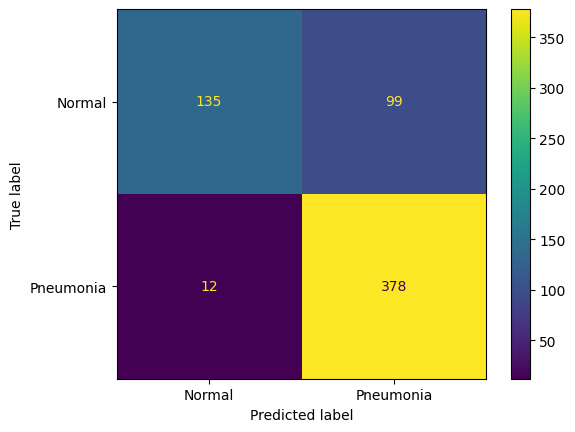

In [17]:
print(f"VGG16 Accuracy: {vgg16_accuracy*100:.2f}%")
print(f"VGG16 F1 Score: {vgg16_f1*100:.2f}%")
print(f"VGG16 Precision: {vgg16_precision*100:.2f}%")
print(f"VGG16 Recall: {vgg16_recall*100:.2f}%")
classes = ['Normal', 'Pneumonia']
disp = ConfusionMatrixDisplay(confusion_matrix=vgg16_confusion, display_labels=classes)
disp.plot(
    include_values=True,
    cmap='viridis',
    ax=None,
    xticks_rotation='horizontal',
    values_format='d'
)

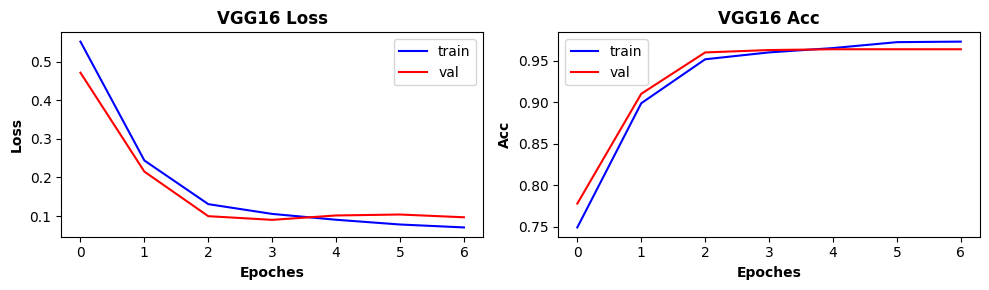

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
data = [
    (train_loss_history_vgg16, val_loss_history_vgg16, 'VGG16 Loss'),
    (train_acc_history_vgg16, val_acc_history_vgg16, 'VGG16 Acc')
]

for i, (tr, val, title) in enumerate(data):
    ax[i].plot(np.arange(early_count), tr, label='train', color='blue')
    ax[i].plot(np.arange(early_count), val, label='val', color='red')
    ax[i].set_xlabel('Epoches', fontweight='bold')
    ax[i].set_ylabel('Loss' if title == 'VGG16 Loss' else 'Acc', fontweight='bold')
    ax[i].set_title(title, fontweight='bold')
    ax[i].legend()

plt.tight_layout()
plt.show()